# Histogram of Gradients : HOG 

### 1) Importing the libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io

### 2) Load the image

In [2]:
image_path = '3.jpg'

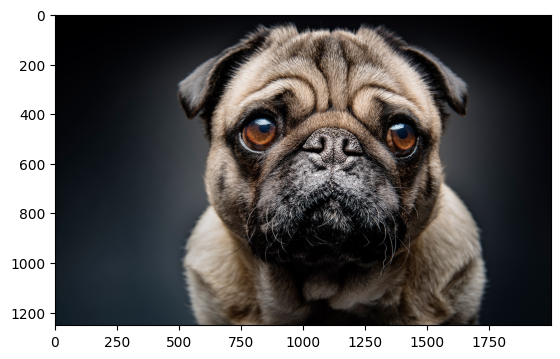

In [3]:
# Load an image from a file
image = io.imread(image_path)
plt.imshow(image)

### Step 1: Preprocess the image

In [4]:
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Resize the image to a fixed size
    resized_image = cv2.resize(gray_image, (128, 256))  

    # Apply local contrast normalization 
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    normalized_image = clahe.apply(resized_image)
    
    return normalized_image

In [5]:
norm = preprocess_image(image_path)

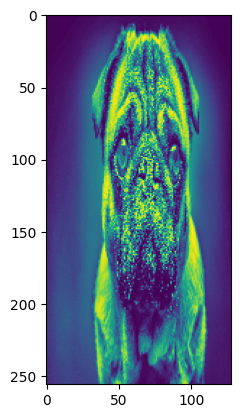

In [6]:
plt.imshow(norm)

### Step 2: Compute gradients

In [7]:
def compute_gradients(image):
    # Calculate gradients using Sobel operators
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    
    # Calculate gradient magnitude and orientation
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    orientation = np.arctan2(gradient_y, gradient_x) * 180 / np.pi
    
    return magnitude, orientation

In [8]:
magnitude, orientation = compute_gradients(norm)

### Step 3: Divide the image into cells and compute HOG for each cell

In [9]:
def compute_hog_cells(magnitude, orientation, cell_size):
    cells = []
    
    for i in range(0, magnitude.shape[0], cell_size):
        for j in range(0, magnitude.shape[1], cell_size):
            cell_magnitude = magnitude[i:i + cell_size, j:j + cell_size]
            cell_orientation = orientation[i:i + cell_size, j:j + cell_size]
            
            cell_hist = np.histogram(cell_orientation, bins=9, range=(0, 180))[0]
            
            cells.append(cell_hist)
    
    return cells

In [10]:
cell_size=8

### Step 3.1: Plotting few histograms for visualization

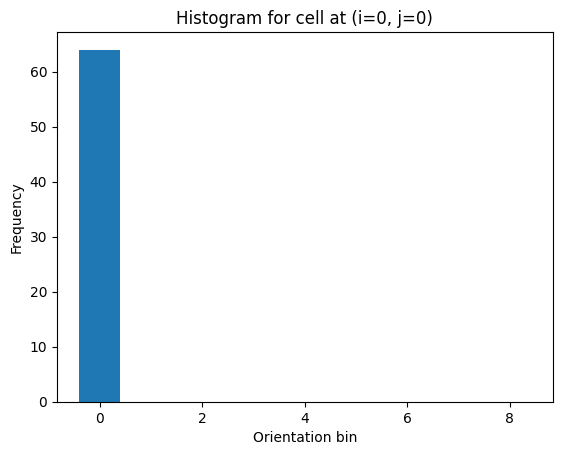

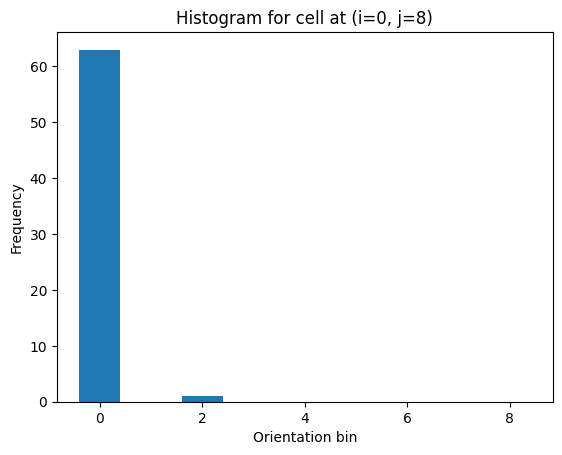

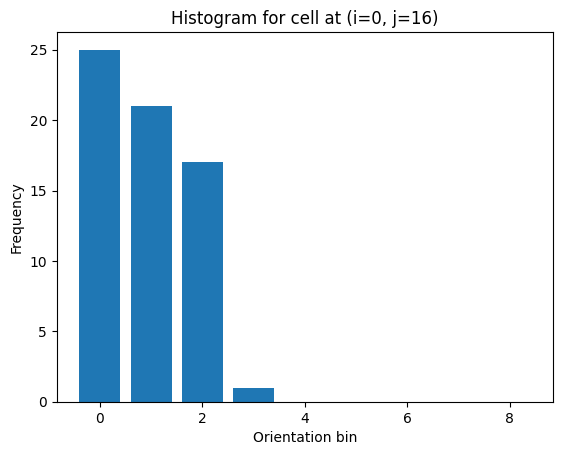

In [11]:
for i in range(0, 8, cell_size):
    for j in range(0, 24, cell_size):
        cell_magnitude = magnitude[i:i + cell_size, j:j + cell_size]
        cell_orientation = orientation[i:i + cell_size, j:j + cell_size]

        cell_hist = np.histogram(cell_orientation, bins=9, range=(0, 180))[0]

        # Plot the histogram
        plt.figure()
        plt.bar(np.arange(9), cell_hist)
        plt.title("Histogram for cell at (i={}, j={})".format(i, j))
        plt.xlabel("Orientation bin")
        plt.ylabel("Frequency")
        plt.show()

In [12]:
cells = compute_hog_cells(magnitude=magnitude, orientation=orientation, cell_size=8)

### Step 4: Block normalization

In [13]:
def block_normalization(cells, block_size=2):
    hog_vector = []
    for i in range(0, len(cells) - block_size + 1, block_size):
        for j in range(0, len(cells[0]) - block_size + 1, block_size):
            block = cells[i:i + block_size, j:j + block_size]
            block_vector = np.concatenate(block).astype(float)  # Ensure block_vector is of float data type
            # L2 normalization
            block_vector /= np.linalg.norm(block_vector)
            hog_vector.extend(block_vector)
    return hog_vector

In [14]:
hog_vector = block_normalization(np.array(cells), block_size=2)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20208\3197033786.py:8: RuntimeWarning: invalid value encountered in divide
  block_vector /= np.linalg.norm(block_vector)


## Plotting the Edges detected by the HOG Technique

In [15]:
def do_the_work(image_path):
    norm = preprocess_image(image_path)
    magnitude, orientation = compute_gradients(norm)
    return magnitude, orientation

In [16]:
mag, ori = do_the_work(image_path)

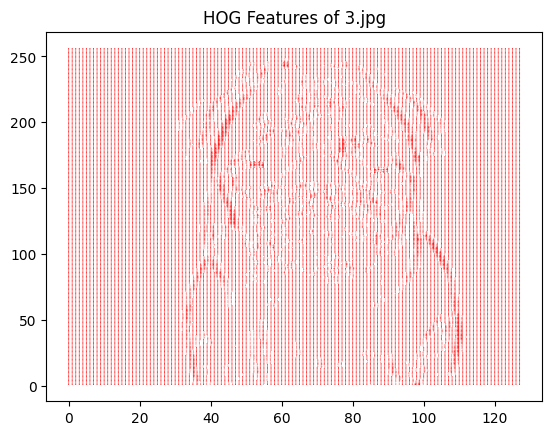

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Normalize the magnitude values
magnitude = mag / np.max(mag)

# Create a grid of points for quiver plot
x = np.arange(0, magnitude.shape[1])
y = np.arange(magnitude.shape[0], 0,-1)

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Convert orientation from degrees to radians
orientation_rad = np.radians(ori)

# Calculate the x and y components of the vectors
U = magnitude * np.cos(orientation_rad)
V = magnitude * np.sin(orientation_rad)

# Create a figure and axis
plt.figure()
plt.title(f'HOG Features of {image_path}')

# Quiver plot to visualize gradient directions
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='red', cmap='hsv', alpha=0.9)

plt.show()
